In [73]:
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

import datasource_config

In [74]:
# Read the processed dataset.
# using config file for source data path
path = datasource_config.CLASSIFICATION_SOURCE_DATA_PATH
phm_df = pd.read_parquet(path, engine='fastparquet')

In [75]:
phm_df

,index,fault_class,individual,pdmp,pin,po,pdmp_avg_first_150,pdmp_avg_last_150,pdmp_avg_mid_300,pdmp_avg_diff,...,po_size,po_total_avg,po_variance,po_skew,po_kurtosis,po_twtt,pdmp_pin_kwut,pdmp_po_kwut,pin_po_kwut,pdmp_pin_po_kwht
0,22776,3,5,"[-0.194942, -0.187465, -0.180348, -0.173447, -...","[-1.731534, -1.755668, -1.738321, -1.691324, -...","[0.230999, 0.146074, 0.045333, -0.082227, -0.2...",-0.380677,0.166427,0.332923,-0.547104,...,571.0,-0.149746,1.056277,0.571217,-1.485157,-5.753815e-06,-1.673449,2.328661,4.145155,31.133930
1,22777,8,5,"[-0.246213, -0.273524, -0.308485, -0.348401, -...","[-1.553456, -1.535349, -1.530819, -1.498527, -...","[0.267242, 0.181471, 0.066593, -0.058671, -0.1...",-0.416614,0.107498,0.379532,-0.524112,...,571.0,-0.123757,1.060788,0.486906,-1.575010,4.370640e-07,-1.384548,2.107081,3.590630,28.394379
2,22778,4,5,"[0.276173, 0.256051, 0.233923, 0.207697, 0.179...","[-1.322575, -1.380218, -1.382825, -1.375426, -...","[0.470566, 0.445597, 0.413041, 0.369268, 0.310...",-0.490820,0.388297,0.206089,-0.879116,...,571.0,-0.122784,1.044903,0.499660,-1.561296,5.006699e-06,-1.479254,1.515997,3.062488,20.596146
3,22779,2,5,"[0.0658, 0.057669, 0.051469, 0.047736, 0.04593...","[-1.409725, -1.365621, -1.333474, -1.283352, -...","[-0.102403, -0.197452, -0.314519, -0.436627, -...",-0.793932,0.596038,0.544159,-1.389970,...,571.0,-0.008986,1.041080,-0.163733,-1.727554,-1.654965e-06,-1.272439,0.067728,1.342652,1.117999
4,22780,2,5,"[0.27768, 0.272525, 0.265093, 0.256061, 0.2469...","[-1.42767, -1.41073, -1.396357, -1.354666, -1....","[-0.0248, -0.119669, -0.252136, -0.41008, -0.5...",-0.804523,0.600944,0.530414,-1.405467,...,571.0,-0.007443,1.033000,-0.165585,-1.718661,-1.391775e-06,-1.125652,-0.045439,1.078964,0.833243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,34141,1,6,"[-0.051017, -0.055426, -0.061033, -0.070764, -...","[-1.191121, -0.940782, -0.640797, -0.310252, -...","[-0.559606, -0.681762, -0.706164, -0.698716, -...",-0.319361,0.209585,0.343784,-0.528946,...,571.0,-0.113808,1.062574,0.484757,-1.594999,2.504394e-06,-1.847099,1.725427,3.675492,25.600899
34141,34142,1,6,"[0.027704, 0.00884, -0.005844, -0.01568, -0.02...","[-1.671334, -1.706622, -1.711954, -1.683148, -...","[0.378552, 0.316211, 0.229241, 0.119138, -0.00...",-0.225832,0.278967,0.148029,-0.504800,...,571.0,-0.115101,1.050273,0.501856,-1.560801,-1.586483e-06,-1.582425,1.751740,3.419522,23.742712
34142,34143,1,6,"[-0.037775, -0.053561, -0.073233, -0.097449, -...","[-1.728436, -1.737226, -1.713788, -1.683285, -...","[0.303343, 0.21896, 0.113885, -0.00383, -0.147...",-0.362291,0.274743,0.296034,-0.637034,...,571.0,-0.120584,1.053842,0.498116,-1.566424,-4.611677e-06,-1.557784,1.771423,3.414773,22.675776
34143,34144,1,6,"[0.095459, 0.086675, 0.078642, 0.068852, 0.057...","[-1.537821, -1.593619, -1.599173, -1.589957, -...","[0.420105, 0.371285, 0.301655, 0.215862, 0.128...",-0.401902,0.333803,0.261973,-0.735706,...,571.0,-0.115785,1.054297,0.475711,-1.586136,-3.706969e-06,-1.660925,1.669087,3.417492,19.866421


In [76]:
# Split the data into features (X) and target (y)
X = phm_df[['individual', 'pdmp_skew', 'pin_skew', 'po_skew', 'pdmp_variance', 'pin_variance', 'po_variance', 'pdmp_kurtosis', 'pin_kurtosis', 'po_kurtosis', 'pdmp_pin_po_kwht', 'pdmp_pin_kwut', 'pdmp_po_kwut', 'pin_po_kwut']]
y = phm_df['fault_class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,individual,pdmp_skew,pin_skew,po_skew,pdmp_variance,pin_variance,po_variance,pdmp_kurtosis,pin_kurtosis,po_kurtosis,pdmp_pin_po_kwht,pdmp_pin_kwut,pdmp_po_kwut,pin_po_kwut
29366,2,-0.830988,-0.419164,-0.098733,1.081030,0.978272,1.065691,-0.293710,0.505678,-1.793577,1.820759,-1.675735,0.359058,2.049984
18332,1,1.086065,-0.369972,0.710476,1.222986,1.040383,1.017653,2.762781,0.871551,-1.287292,30.600817,-0.704031,2.879780,3.743139
432,5,0.387159,-0.466524,0.479582,1.147839,1.059069,1.046336,1.870786,1.188221,-1.585067,20.320810,-1.417128,1.540044,3.023061
28645,2,0.030604,-0.454334,0.657764,1.207406,1.059808,1.028345,0.343045,1.049765,-1.372319,27.348732,-0.781023,2.584648,3.488256
23686,2,0.002084,-0.369797,0.587373,1.183450,1.078460,1.032767,0.450827,0.852582,-1.476746,25.641792,-0.981409,2.117469,3.185309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31271,6,-0.623546,-0.446312,-0.161668,1.007866,0.976720,1.009839,-0.829369,0.233379,-1.706233,0.440587,-0.437138,-0.046183,0.390377
14364,4,0.995312,-0.241057,0.523463,1.158717,1.067858,1.044372,1.406568,0.485290,-1.539255,25.867340,-1.007555,2.048654,3.126720
22883,1,0.964814,-0.410716,0.737595,1.215246,1.049866,1.009333,1.350821,1.132707,-1.266369,38.222736,-0.475700,2.998548,3.615551
16801,1,0.989747,-0.432882,0.744359,1.224285,1.062766,1.005077,1.747422,1.151890,-1.250270,34.772461,-0.345958,3.009648,3.488812


In [77]:
y_test

26151     4
8051      1
7737      5
7147      8
14028     7
         ..
12494     7
31559    10
4369      1
14110    11
7592     10
Name: fault_class, Length: 6829, dtype: int32

In [78]:

warnings.filterwarnings("ignore", category=FutureWarning, message="`max_features='auto'` has been deprecated")

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
f1_list = []
recall_list = []

for learning_rate in lr_list:

    # get the start time
    st = time.time()

    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features='log2', max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
    # get the end time
    et = time.time()

    # get the execution time
    elapsed_time = et - st
    print('Modelling training time:', elapsed_time, 'seconds')

    print("Learning rate: ", learning_rate)
    train_accuracy_score = gb_clf.score(X_train, y_train)
    train_accuracy_list.append(train_accuracy_score)
    test_accuracy_score = gb_clf.score(X_test, y_test)
    test_accuracy_list.append(test_accuracy_score)
    print("Accuracy score (training): {0:.3f}".format(train_accuracy_score))
    print("Accuracy score (validation): {0:.3f}".format(test_accuracy_score))

    accuracy_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='precision_macro')
    recall_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='recall_macro')
    f1_scores = cross_val_score(gb_clf, X, y, cv=5, scoring='f1_macro')

    print("CROSS VALIDATION SCORES: ")
    print("Accuracy Score: ", np.mean(accuracy_scores))
    accuracy_list.append(np.mean(accuracy_scores))
    print("Precision Score: ", np.mean(precision_scores))
    precision_list.append(np.mean(precision_scores))
    print("Recall Score: ", np.mean(recall_scores))
    recall_list.append(np.mean(recall_scores))
    print("F1 Score: ", np.mean(f1_scores))
    f1_list.append(np.mean(f1_scores))
        

Modelling training time: 4.530796051025391 seconds
Learning rate:  0.05
Accuracy score (training): 0.729
Accuracy score (validation): 0.716
CROSS VALIDATION SCORES: 
Accuracy Score:  0.5750183042905256
Precision Score:  0.5770241609362057
Recall Score:  0.5631561550920491
F1 Score:  0.5279938542819463
Modelling training time: 4.507666826248169 seconds
Learning rate:  0.075
Accuracy score (training): 0.762
Accuracy score (validation): 0.743
CROSS VALIDATION SCORES: 
Accuracy Score:  0.5942597744911408
Precision Score:  0.6037754290334911
Recall Score:  0.5832346195632953
F1 Score:  0.5543997693672692
Modelling training time: 4.515913963317871 seconds
Learning rate:  0.1
Accuracy score (training): 0.783
Accuracy score (validation): 0.768
CROSS VALIDATION SCORES: 
Accuracy Score:  0.6205593791184654
Precision Score:  0.6290535327033643
Recall Score:  0.6106392441811586
F1 Score:  0.5888745378619887
Modelling training time: 4.560541868209839 seconds
Learning rate:  0.25
Accuracy score (tra

/Users/sauravdas221/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CROSS VALIDATION SCORES: 
Accuracy Score:  0.676936593937619
Precision Score:  0.6667179006187253
Recall Score:  0.6727475715740099
F1 Score:  0.6569993590008936


test_accuracy_list:  [0.7162102796895592, 0.7425684580465661, 0.7683408991067506, 0.8408258895885196, 0.8829989749597306, 0.8857812271196368, 0.8951530238687948]
learning_rate:  [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]


Text(0, 0.5, 'Testing Accuracy Scores')

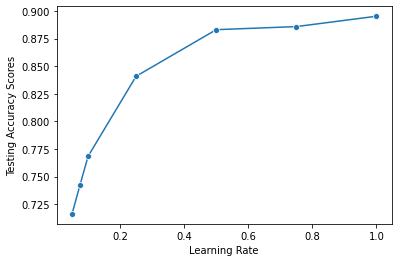

In [79]:
print("test_accuracy_list: ", test_accuracy_list)
print("learning_rate: ", lr_list)
sns.lineplot(x = lr_list, y = test_accuracy_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("Testing Accuracy Scores")


train_accuracy_list:  [0.7287670229901889, 0.7620076145848587, 0.7828378972031044, 0.8648045101771855, 0.9040123004832332, 0.9117733196661297, 0.923012154048909]
learning_rate:  [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]


Text(0, 0.5, 'Training Accuracy Scores')

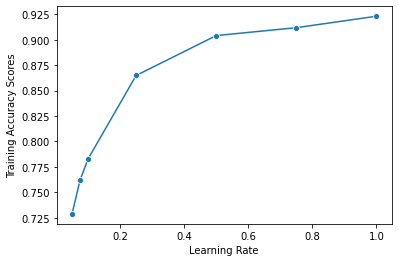

In [80]:
print("train_accuracy_list: ", train_accuracy_list)
print("learning_rate: ", lr_list)
sns.lineplot(x = lr_list, y = train_accuracy_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("Training Accuracy Scores")

precision_list [0.5770241609362057, 0.6037754290334911, 0.6290535327033643, 0.713823949199197, 0.8082939920901466, 0.8159076559732048, 0.6667179006187253]


Text(0, 0.5, 'Precision Scores')

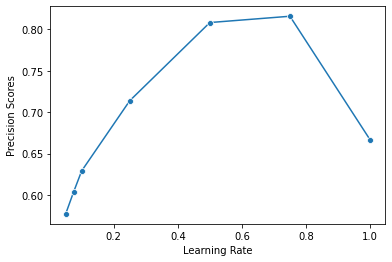

In [81]:
print("precision_list", precision_list)
sns.lineplot(x = lr_list, y = precision_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("Precision Scores")


Text(0, 0.5, 'Recall Scores')

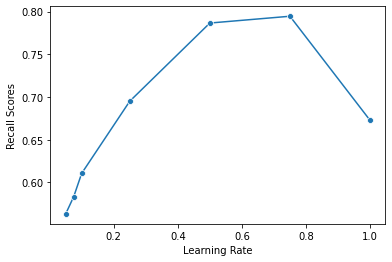

In [82]:
sns.lineplot(x = lr_list, y = recall_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("Recall Scores")


Text(0, 0.5, 'F1 Scores')

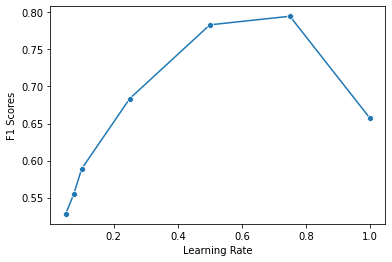

In [83]:
sns.lineplot(x = lr_list, y = f1_list, marker = 'o')
plt.xlabel("Learning Rate")
plt.ylabel("F1 Scores")


In [84]:
print("Best Accuracy: ", np.max(accuracy_list))
print("Best Precision: ", np.max(precision_list))
print("Best Recall: ", recall_list)
print("Best Recall: ", np.max(recall_list))
print("Best F1: ", np.max(f1_list))

Best Accuracy:  0.8000292868648412
Best Precision:  0.8159076559732048
Best Recall:  [0.5631561550920491, 0.5832346195632953, 0.6106392441811586, 0.6950457976935633, 0.7865490833068279, 0.7945028744637762, 0.6727475715740099]
Best Recall:  0.7945028744637762
Best F1:  0.794831048987572


In [85]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
train_accuracy_list = []
test_accuracy_list = []

xgb_clf = XGBClassifier()
# get the start time
st = time.time()

xgb_clf.fit(X_train, y_train - 1)
# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Modelling training time:', elapsed_time, 'seconds')

score = xgb_clf.score(X_test, y_test - 1)
print(score)


Modelling training time: 14.069040060043335 seconds
0.9692487919168253


In [86]:
# make predictions on your test data
y_pred = xgb_clf.predict(X_test)
# print(y_pred)
# print(y_test-1)

i = 0
count = 0
y_test_list = y_test.values - 1
for i in range(0, len(y_test_list)):
    if (y_test_list[i] == y_pred[i]):
        count = count + 1
print(len(y_test_list))
print(count)

print("Manual Accuracy: ", count/len(y_test_list))

# calculate accuracy
accuracy = accuracy_score(y_test - 1, y_pred)

# # calculate precision
# precision = precision_score(y_test - 1, y_pred, average='weighted')

# # calculate recall
# recall = recall_score(y_test - 1, y_pred, average='weighted')

# # calculate f1-score
# f1 = f1_score(y_test - 1, y_pred, average='weighted')

print("accuracy: ", accuracy)
# print("precision: ", precision)
# print("recall: ", recall)
# print("f1: ", f1)



6829
6619
Manual Accuracy:  0.9692487919168253
accuracy:  0.9692487919168253


In [87]:
cm = confusion_matrix(y_test-1, y_pred)
cm

array([[582,   0,   0,   0,  39,   1,   1,   2,   4,   9,   0],
       [  0, 704,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0, 614,   0,   0,   0,   0,   0,   4,   0,   0],
       [  0,   0,   1, 604,   0,   0,   0,   0,   0,   2,   0],
       [ 45,   0,   0,   0, 571,   0,   0,   0,   0,   2,   0],
       [  1,   0,   0,   0,   0, 576,   1,   0,   0,   1,   0],
       [  1,   0,   0,   0,   0,   0, 591,  32,   0,   1,   0],
       [  2,   0,   0,   0,   0,   0,  39, 603,   0,   1,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0, 625,   6,   0],
       [  5,   0,   0,   0,   1,   0,   1,   0,   4, 516,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 633]])

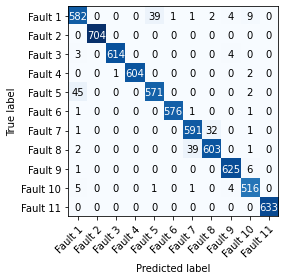

In [88]:
# plot the confusion matrix as an image
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Fault ' + str(x) for x in range(1, 12)],
       yticklabels=['Fault ' + str(x) for x in range(1, 12)],
       xlabel='Predicted label',
       ylabel='True label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# add the values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

fig.tight_layout()
plt.show()


In [33]:
param_grid = {'learning_rate': [0.5, 0.75, 1.0],
              'n_estimators': [50, 100],
              'max_depth': [3, 5, 15]
             }

xgb = XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, return_train_score=True)
random_search.fit(X_train, y_train-1)
print(random_search.best_params_)
print(random_search.best_score_)


{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.5}
0.968516613426836


In [70]:
param_grid = {'learning_rate': [0.5],
              'n_estimators': [100],
              'max_depth': [5]
             }

xgb = XGBClassifier(random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, cv=5, random_state=42, return_train_score=True)
random_search.fit(X_train, y_train-1)
print(random_search.best_params_)
print(random_search.best_score_)


/Users/sauravdas221/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.5}
0.968516613426836


In [71]:
# print(random_search.cv_results_)
# get the mean training and testing scores for each combination of hyperparameters
train_scores = random_search.cv_results_['mean_train_score']
test_scores = random_search.cv_results_['mean_test_score']
print("Train score: ", np.mean(train_scores))
print("Test score: ", np.mean(test_scores))
# get the training times for each combination of hyperparameters
train_times = random_search.cv_results_['mean_fit_time']

# print the results
# for i in range(len(train_scores)):
#     print("Train score: {:.4f}, Test score: {:.4f}, Training time: {:.4f}".format(
#           train_scores[i], test_scores[i], train_times[i]))


Train score:  1.0
Test score:  0.968516613426836
